In [28]:
import numpy as np
import gwpy
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

In [29]:
CHANNEL = 'DCS-CALIB_STRAIN_CLEAN_C01'
FRAME_TYPE = 'HOFT_C01'
STATE_FLAG = 'DCS-ANALYSIS_READY_C01:1'

In [30]:
def resample_bandpass_whiten(strainL1, strainH1, sample_rate=4096, bandpass_low=30, bandpass_high=1500):

    # Whiten, bandpass, and resample
    strainL1 = strainL1.resample(sample_rate)
    strainL1 = strainL1.bandpass(bandpass_low, bandpass_high).whiten()
    
    strainH1 = strainH1.resample(sample_rate)
    strainH1 = strainH1.bandpass(bandpass_low, bandpass_high).whiten()

    return strainL1, strainH1

In [31]:
def plot_strain(start_point, end_point):

    sample_rate = 4096
    
    # Load open LIGO data
    strainL1_open = TimeSeries.fetch_open_data('L1', start_point, end_point)
    strainH1_open = TimeSeries.fetch_open_data('H1', start_point, end_point)
    strainL1_open, strainH1_open = resample_bandpass_whiten(strainL1_open, strainH1_open, sample_rate)
    
    # Load LIGO data
    strainL1 = TimeSeries.get(f'L1:{CHANNEL}', start_point, end_point)
    strainH1 = TimeSeries.get(f'H1:{CHANNEL}', start_point, end_point)
    strainL1, strainH1 = resample_bandpass_whiten(strainL1, strainH1, sample_rate)

    # Define the range for plotting
    start_idx = int(100.3 * sample_rate)
    end_idx = int(100.8 * sample_rate)
    
    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # First subplot: strainL1 and strainH1 together
    ax1.plot(strainL1[start_idx:end_idx], label="strainL1")
    ax1.plot(strainH1[start_idx:end_idx], label="strainH1")
    ax1.set_title("Strain: L1 vs H1")
    ax1.set_xlabel("Time [samples]")
    ax1.set_ylabel("Strain")
    ax1.legend()
    ax1.grid()
    
    # Second subplot: strainL1_open and strainH1_open together
    ax2.plot(strainL1_open[start_idx:end_idx], label="strainL1_open")
    ax2.plot(strainH1_open[start_idx:end_idx], label="strainH1_open")
    ax2.set_title("Open Data: L1 vs H1")
    ax2.set_xlabel("Time [samples]")
    ax2.set_ylabel("Strain")
    ax2.legend()
    ax2.grid()
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

/home/katya.govorkova/miniconda3/envs/quak/lib/python3.9/site-packages/gwpy/timeseries/timeseries.py:930: UserWarning: resample() rate matches current sample_rate (4096.0 Hz), returning input data unmodified; please double-check your parameters
  warnings.warn(


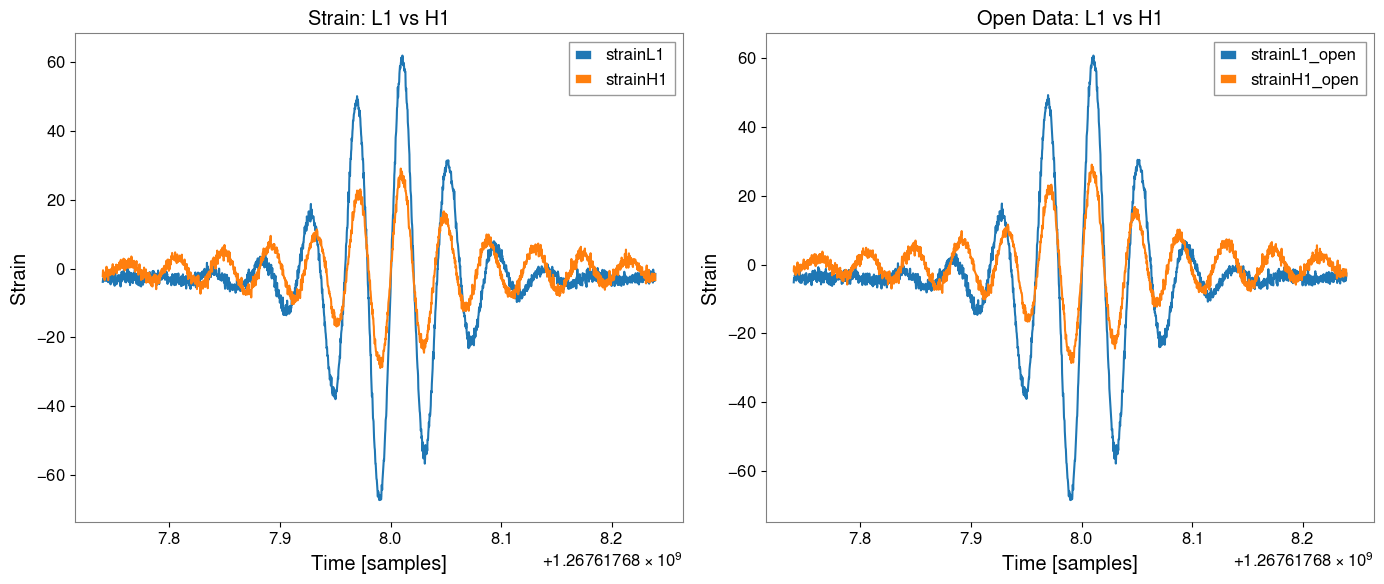

In [32]:
injection_point = 1267617687.94
plot_strain(injection_point - 100.5, injection_point+100.5)